# Introduction au traitement d'images avec numpy

Pour un système informatique, une image est une structure de données bidimensionnelle (ou tridimensionnelle pour les images couleur) composée de pixels. Chaque pixel est une unité d'information représentant l'intensité ou la couleur à un point donné. Cette représentation matricielle est idéalement gérée par les tableaux multidimensionnels (`ndarray`) de NumPy.

Ce chapitre couvre le chargement, l'inspection et la manipulation de base des images en les traitant comme des tableaux NumPy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data # Bibliothèque pour des images d'exemple


---

## Chargement et affichage d'une image

Nous utiliserons la bibliothèque `scikit-image` pour charger une image d'exemple et `matplotlib` pour son affichage. L'image est automatiquement chargée sous forme de tableau NumPy.

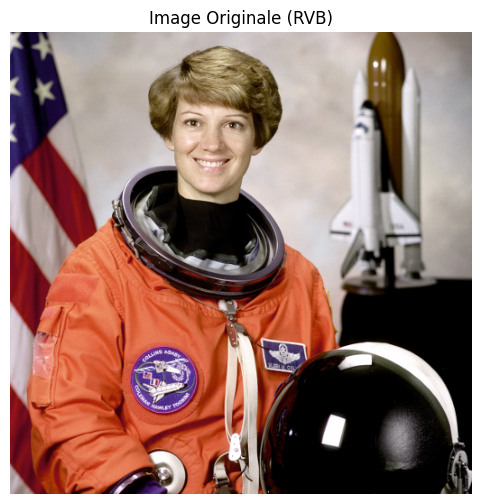

In [2]:
# Chargement de l'image de l'astronaute
image_rgb = data.astronaut()

# Affichage de l'image
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title("Image Originale (RVB)")
plt.axis('off') # Désactivation des axes pour un affichage plus propre
plt.show()

---

## Inspection des propriétés de l'image

Puisqu'une image est un tableau NumPy, ses propriétés peuvent être inspectées via ses attributs :

-   **Images en couleurs (rvb)** : Représentées par des tableaux 3D de forme `(hauteur, largeur, 3)`. La troisième dimension correspond aux canaux Rouge, Vert, Bleu.
-   **Images en niveaux de gris** : Représentées par des tableaux 2D de forme `(hauteur, largeur)`. Chaque pixel a une seule valeur d'intensité.

In [3]:
print(f"Type de l'objet image : {type(image_rgb)}")
print(f"Forme (shape) de l'image : {image_rgb.shape}")
print(f"Type de données des pixels : {image_rgb.dtype}")

hauteur, largeur, nb_canaux = image_rgb.shape
print(f"Hauteur : {hauteur} pixels")
print(f"Largeur : {largeur} pixels")
print(f"Nombre de canaux de couleur : {nb_canaux}")

# Les valeurs des pixels sont généralement entre 0 (noir) et 255 (intensité maximale)
print(f"Valeur minimale des pixels : {np.min(image_rgb)}")
print(f"Valeur maximale des pixels : {np.max(image_rgb)}")

Type de l'objet image : <class 'numpy.ndarray'>
Forme (shape) de l'image : (512, 512, 3)
Type de données des pixels : uint8
Hauteur : 512 pixels
Largeur : 512 pixels
Nombre de canaux de couleur : 3
Valeur minimale des pixels : 0
Valeur maximale des pixels : 255


---

## Manipulation des canaux de couleur

L'accès aux canaux de couleur individuels (Rouge, Vert, Bleu) s'effectue par *slicing* sur la troisième dimension du tableau NumPy.

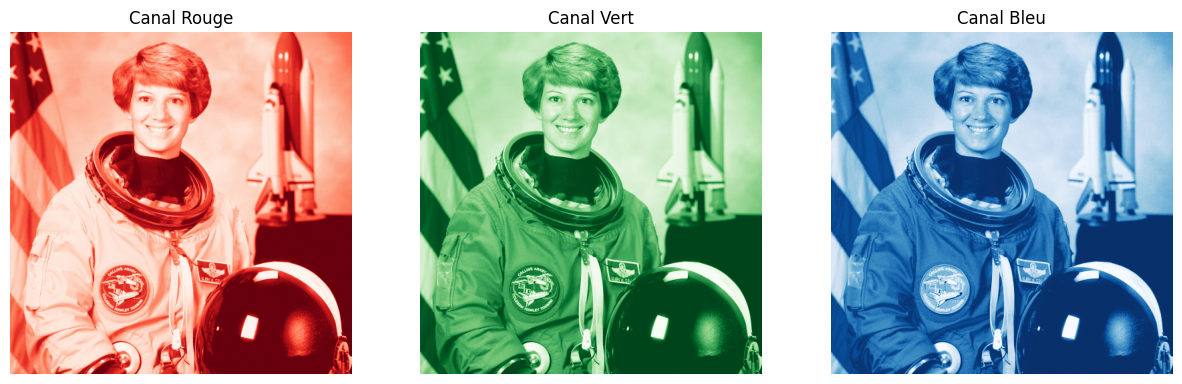

In [4]:
# Extraction des canaux individuels
canal_rouge = image_rgb[:, :, 0]
canal_vert = image_rgb[:, :, 1]
canal_bleu = image_rgb[:, :, 2]

# Affichage de chaque canal en niveaux de gris
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(canal_rouge, cmap='Reds_r')
axes[0].set_title("Canal Rouge")
axes[0].axis('off')

axes[1].imshow(canal_vert, cmap='Greens_r')
axes[1].set_title("Canal Vert")
axes[1].axis('off')

axes[2].imshow(canal_bleu, cmap='Blues_r')
axes[2].set_title("Canal Bleu")
axes[2].axis('off')

plt.show()

---

## Conversion en Niveaux de Gris

Une méthode courante pour convertir une image couleur en niveaux de gris consiste à calculer la moyenne des intensités des trois canaux RVB pour chaque pixel. L'opération `np.mean()` appliquée le long de l'axe des canaux (`axis=2`) réalise cette conversion.

Forme (shape) de l'image en niveaux de gris : (512, 512)


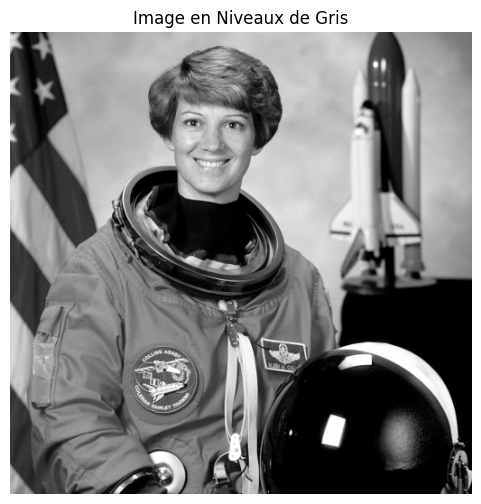

In [5]:
# Calcul de la moyenne des canaux de couleur
image_gris = np.mean(image_rgb, axis=2).astype(np.uint8)

print(f"Forme (shape) de l'image en niveaux de gris : {image_gris.shape}")

plt.figure(figsize=(6, 6))
plt.imshow(image_gris, cmap='gray')
plt.title("Image en Niveaux de Gris")
plt.axis('off')
plt.show()

---

## Manipulation Directe des Pixels

L'image étant un tableau NumPy, il est possible de manipuler directement les valeurs des pixels ou des régions entières en utilisant l'indexation et le *slicing*.

*Note : Il est recommandé de travailler sur une copie de l'image originale pour éviter des modifications permanentes.*

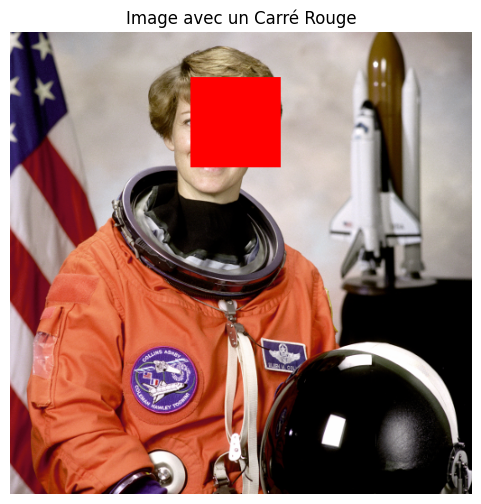

In [6]:
# Création d'une copie de l'image originale
image_modifiee = image_rgb.copy()

# Dessin d'un carré rouge dans une région spécifique
# Les valeurs de pixels sont modifiées pour créer une couleur rouge (R=255, G=0, B=0)
image_modifiee[50:150, 200:300, 0] = 255 # Canal Rouge (intensité maximale)
image_modifiee[50:150, 200:300, 1] = 0   # Canal Vert (intensité minimale)
image_modifiee[50:150, 200:300, 2] = 0   # Canal Bleu (intensité minimale)

plt.figure(figsize=(6, 6))
plt.imshow(image_modifiee)
plt.title("Image avec un Carré Rouge")
plt.axis('off')
plt.show()